In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt


clinical = pd.read_csv('clinicaltrial_data.csv')
mouse = pd.read_csv('mouse_drug_data.csv')

display(clinical.head())
display(mouse.head())
print(clinical.columns)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')


In [2]:
full_df = clinical.merge(mouse, on='Mouse ID')


grouped = full_df.groupby(['Drug','Timepoint'])
test = pd.DataFrame(grouped['Tumor Volume (mm3)'].mean())
#test['STD'] = grouped['Tumor Volume (mm3)'].std()
#test['SQRTN'] = np.sqrt(grouped['Tumor Volume (mm3)'].count())
#test['error'] = test['STD']/test['SQRTN']
test['sem'] = grouped['Tumor Volume (mm3)'].sem()

display(test.head())

test.loc['Capomulin'].reset_index()


Tumor Volume (mm3)       sem
Drug      Timepoint                              
Capomulin 0                   45.000000  0.000000
          5                   44.266086  0.448593
          10                  43.084291  0.702684
          15                  42.064317  0.838617
          20                  40.716325  0.909731

,Timepoint,Tumor Volume (mm3),sem
0,0,45.000000,0.000000
1,5,44.266086,0.448593
2,10,43.084291,0.702684
3,15,42.064317,0.838617
4,20,40.716325,0.909731
5,25,39.939528,0.881642
6,30,38.769339,0.934460
7,35,37.816839,1.052241
8,40,36.958001,1.223608
9,45,36.236114,1.223977


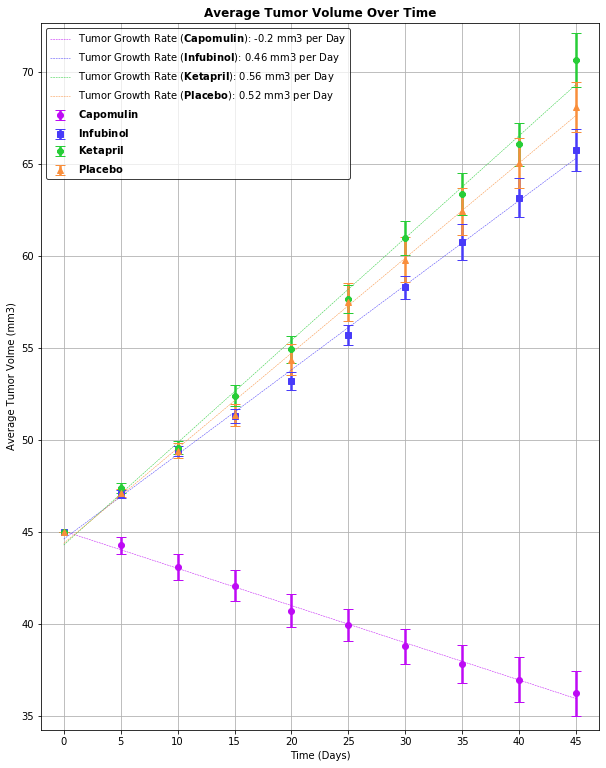

In [3]:
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
colors = ['#BE0AF5','#483BF9', '#27CD37', '#F98E3B']
marker = ['o','s','8','^']
plt.figure(figsize=(10,13))
y_data_tot = []
for i in range(len(drugs)):
    data = test.loc[drugs[i]].reset_index()
    x_data = data.loc[:,'Timepoint'].values
    y_data = data.loc[:,'Tumor Volume (mm3)'].values
    err = data.loc[:,'sem'].values
    y_data_tot.append(y_data)
    
    
    model = stats.linregress(x_data, y_data)
    y_hat = [(model[0]*x)+model[1] for x in x_data]
    plt.errorbar(x_data, y_data, yerr=err, color=colors[i],fmt=marker[i],label=r'$\bf{}$'.format(drugs[i]),
                capsize=5,linewidth=2.5)
    plt.plot(x_data, y_hat, color=colors[i],linestyle='--' ,linewidth=.5, label=r'Tumor Growth Rate ($\bf{}$): {} mm3 per Day'.format(drugs[i],round(model[0],2)))
    
    #slope = []
    #for j in range(1,len(y_data)):
    #    dy = y_data[j]-y_data[j-1]
    #    dx = x_data[j] - x_data[j-1]
    #    slope.append(dy/dx)
       
    #print('{} .linregress slope: {}'.format(drugs[i],model[0]))
    #print('{} calc slope:        {}'.format(drugs[i],np.sum(slope)/len(slope)))
    
plt.title("Average Tumor Volume Over Time",fontsize=12, fontweight='bold')
plt.xlim(-2,np.max(x_data)+2)
plt.xticks(range(0,np.max(x_data)+1,5))
plt.xlabel('Time (Days)')
plt.ylim(np.min(y_data_tot)-2,np.max(y_data_tot)+2)
plt.ylabel('Average Tumor Volme (mm3)')
plt.grid(True)
plt.legend(loc='best',fancybox=True, fontsize='medium', framealpha=.75,edgecolor='k')
plt.show()

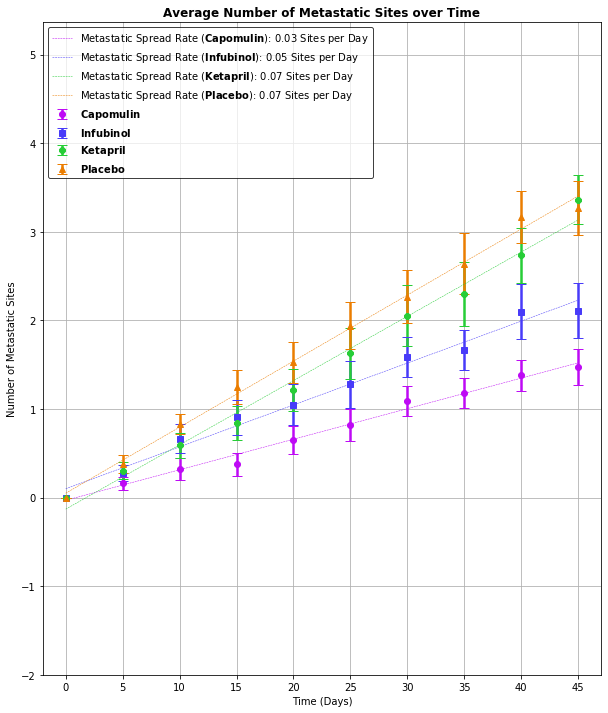

<Figure size 864x720 with 0 Axes>

In [4]:
metastic = pd.DataFrame(grouped['Metastatic Sites'].mean())
metastic['error'] = grouped['Metastatic Sites'].sem()
marker = ['o','s','8','^']


drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
colors = ['#BE0AF5','#483BF9', '#27CD37', '#EB7D00']
plt.figure(figsize=(10,12))
y_data_tot = []
for i in range(len(drugs)):
    data = metastic.loc[drugs[i]].reset_index()
    x_data = data.loc[:,'Timepoint'].values
    y_data = data.loc[:,'Metastatic Sites'].values
    err = data.loc[:,'error'].values
    y_data_tot.append(y_data)
   
    
    model = stats.linregress(x_data, y_data)
    y_hat = [(model[0]*x)+model[1] for x in x_data]
    
    plt.errorbar(x_data, y_data, yerr=err, color=colors[i],fmt=marker[i],label=r'$\bf{}$'.format(drugs[i]),
                capsize=5,linewidth=2.5)
    plt.plot(x_data, y_hat, color=colors[i],linestyle='--' ,linewidth=.5, label=r'Metastatic Spread Rate ($\bf{}$): {} Sites per Day'.format(drugs[i],round(model[0],2)))
    
plt.title("Average Number of Metastatic Sites over Time",fontsize=12, fontweight='bold')
plt.xlim(-2,np.max(x_data)+2)
plt.xticks(range(0,np.max(x_data)+1,5))
plt.xlabel('Time (Days)')
plt.ylim(np.min(y_data_tot)-2,np.max(y_data_tot)+2)
plt.ylabel('Number of Metastatic Sites')
plt.grid(True)
plt.legend(loc='best',fancybox=True, fontsize='medium', framealpha=.75,edgecolor='k')
plt.figure(figsize=(12,10))
plt.show()

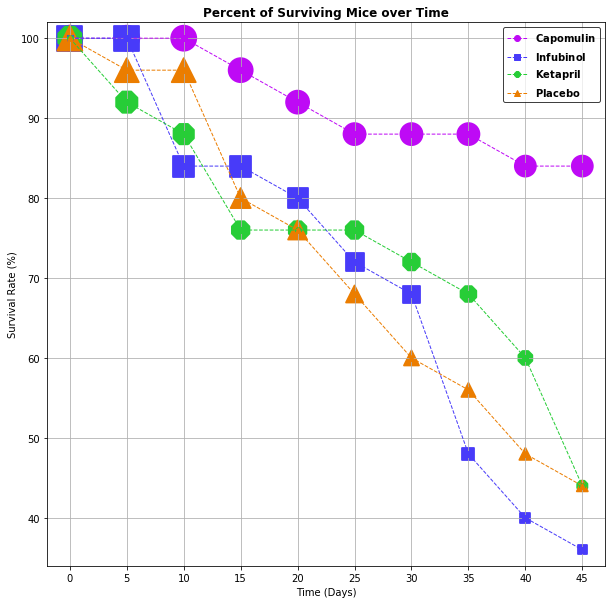

<Figure size 864x720 with 0 Axes>

In [5]:
survival = pd.DataFrame(grouped['Mouse ID'].count())
survival.head()


drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
colors = ['#BE0AF5','#483BF9', '#27CD37', '#EB7D00']
marker = ['o','s','8','^']


plt.figure(figsize=(10,10))
y_data_tot = []
for i in range(len(drugs)):
    data = survival.loc[drugs[i]].reset_index()
    x_data = data.loc[:,'Timepoint'].values
    y_data = data.loc[:,'Mouse ID'].values
    y_per = [round((y/y_data.max())*100,2) for y in y_data]
   
    y_data_tot.append(y_per)
    s=[y**2 for y in y_data]
   
    
    model = stats.linregress(x_data, y_data)
    y_hat = [(model[0]*x)+model[1] for x in x_data]
    
    plt.plot(x_data, y_per, color=colors[i],marker=marker[i],label=r'$\bf{}$'.format(drugs[i]),
                linewidth=1,linestyle='--')
    plt.scatter(x_data, y_per,s=[y**2 for y in y_data], color=colors[i],marker=marker[i],
                linewidth=1.8)
    #plt.plot(x_data, y_hat, color=colors[i],linestyle='--' ,linewidth=0, label=' Avg. Survival Rate with {}: {} Survivors per Day'.format(drugs[i],round(model[0],2)))
    
plt.title("Percent of Surviving Mice over Time",fontsize=12, fontweight='bold')
plt.xlim(-2,np.max(x_data)+2)
plt.xticks(range(0,np.max(x_data)+1,5))
plt.xlabel('Time (Days)')
plt.ylim(np.min(y_data_tot)-2,np.max(y_data_tot)++2)
plt.ylabel('Survival Rate (%)')
plt.grid(True)
plt.legend(loc='best',fancybox=True, fontsize='medium', framealpha=.75,edgecolor='k')
plt.figure(figsize=(12,10))
plt.show()

<Figure size 864x720 with 0 Axes>

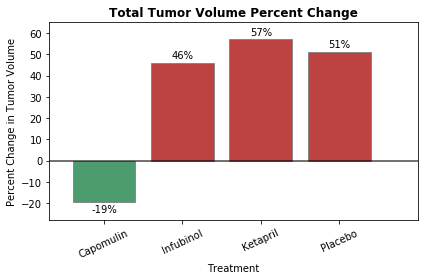

In [6]:


percent_change = []

for i in drugs:
    data = test.loc[i].reset_index()
    start_vol = data.loc[:,'Tumor Volume (mm3)'].values[0]
    end_vol = data.loc[:,'Tumor Volume (mm3)'].values[-1]
    percent_change.append((end_vol-start_vol)/start_vol)
    
    
x_data = np.array(drugs)
y_data = np.array(percent_change,dtype=float)
y_data = np.multiply(y_data,100)

mask1 = y_data < 0
mask2 = y_data > 0


plt.figure(figsize=(12,10))
fig, ax = plt.subplots()

rects1 = plt.bar(x_data[mask1],y_data[mask1], color='#2e8b57',alpha=.85,edgecolor='#808080')
rects2 = plt.bar(x_data[mask2],y_data[mask2], color='#b22222',alpha=.85,edgecolor='#808080')

for rect in rects1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height-1,
            '{}'.format(int(height)) + "%", ha='center', va='top')
for rect in rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height+1,
            '{}'.format(int(height)) + "%", ha='center', va='bottom')

plt.xticks(rotation=25)
plt.title('Total Tumor Volume Percent Change',fontsize=12, fontweight='bold')
plt.xlabel('Treatment')
plt.ylabel('Percent Change in Tumor Volume')
plt.xlim(-0.7,4)
plt.ylim(-28,65)
plt.hlines(0,-1,10, alpha=.73)
plt.yticks(np.arange(-20,61,10))
plt.tight_layout()


plt.show()


# Conclusions:
#### 1)  Out of the four treatments focused on for this analysis, the Capomulin treatment has the best results across all of the metrics explored.  The chart showing Average Tumor Volumne over Time is the most obvious representation of this trend because Capomulin was the only treatment examined that actually decreased the size of the tumor, rather than merely slowing the growth rate.
#### 2) In comparison to the "Placebo" group, a group used to measure the inpact of drug delivery (ex: injection) or living conditions across the 45 day experiment, the Ketapril treatment actually increased the tumor growth rate as well as the total tumor volume percent change.  The placebo groups average tumor growth rate was 0.52 mm3 per day, while the Ketapril treatment groups average growth rate was 0.56 mm3 per day.  Further, the total tumor volume percent change for the placebo group was 51% and the percent increase for Ketapril was 57%.   These results seem to point towards the conclusion that no treatment would be a better option than using Ketapril as a treatment, however the variance (or error) in each average tumor volume used to calculate these rates is large enough to cover this difference in tumor volume growth rate.  This essentially means that the difference in average rate is negligable and the Ketapril treament shouldn't be considered worse than no treatment. 
#### 3) Over the last 15 days of the experiment, the Infubinol treatment group had a steep increase in death reate (shown by the drop in the Infubinol line from day 30-45 in the "Percent of Surviving Mice over Time" graph).  The placebo group had a more constant death rate during this period, meaning the increase in death rate of the Infubinol group was not likely due to some underlying factor of being a test subject in an experiment over a period of time.  It could be interesting to have the scientists who performed this experiment look into potential causes of the increase in death rate.

# ALL EXTRA STUFF NOW


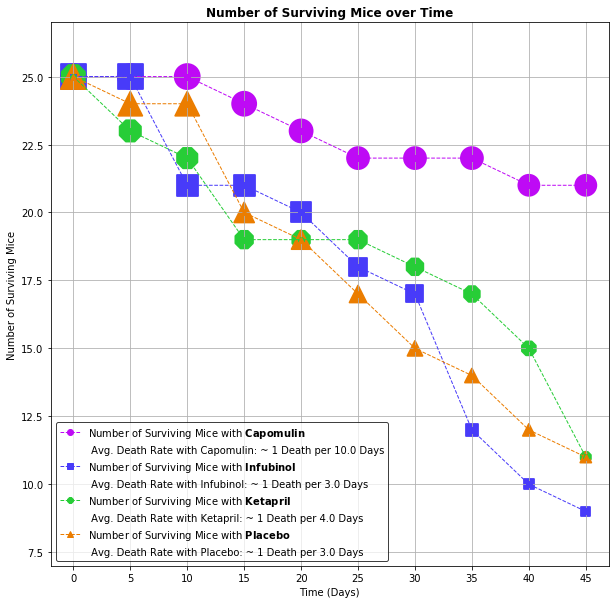

<Figure size 864x720 with 0 Axes>

In [7]:
survival = pd.DataFrame(grouped['Mouse ID'].count())
survival.head()


drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
colors = ['#BE0AF5','#483BF9', '#27CD37', '#EB7D00']
marker = ['o','s','8','^']

def days_to_death(rate):
    days = 1/rate
    return days

plt.figure(figsize=(10,10))
y_data_tot = []
for i in range(len(drugs)):
    data = survival.loc[drugs[i]].reset_index()
    x_data = data.loc[:,'Timepoint'].values
    y_data = data.loc[:,'Mouse ID'].values
    
    model = stats.linregress(x_data, y_data)
    y_hat = [(model[0]*x)+model[1] for x in x_data]
   
    y_data_tot.append(y_data)
    s=[y**2 for y in y_data]
   
    days = days_to_death(model[0])
    
    
    plt.plot(x_data, y_data, color=colors[i],marker=marker[i],label=r'Number of Surviving Mice with $\bf{}$'.format(drugs[i]),
                linewidth=1,linestyle='--')
    plt.scatter(x_data, y_data,s=[y**2 for y in y_data], color=colors[i],marker=marker[i],
                linewidth=1.8)
    plt.plot(x_data, y_hat, color=colors[i],linestyle='--' ,linewidth=0, label=' Avg. Death Rate with {}: ~ 1 Death per {} Days'.format(drugs[i],-1*round(days,0)))
    
plt.title("Number of Surviving Mice over Time",fontsize=12, fontweight='bold')
plt.xlim(-2,np.max(x_data)+2)
plt.xticks(range(0,np.max(x_data)+1,5))
plt.xlabel('Time (Days)')
plt.ylim(round(np.min(y_data_tot),0)-2,np.max(y_data_tot)++2)
plt.ylabel('Number of Surviving Mice')
plt.grid(True)
plt.legend(loc='best',fancybox=True, fontsize='medium', framealpha=.75,edgecolor='k')
plt.figure(figsize=(12,10))
plt.show()

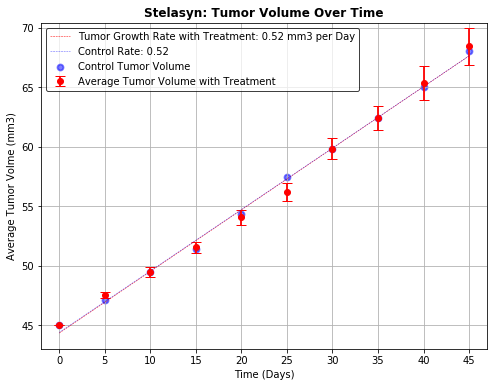

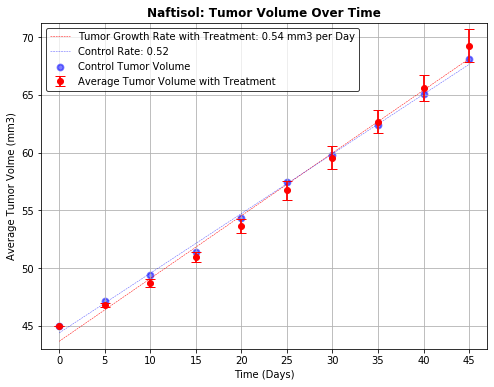

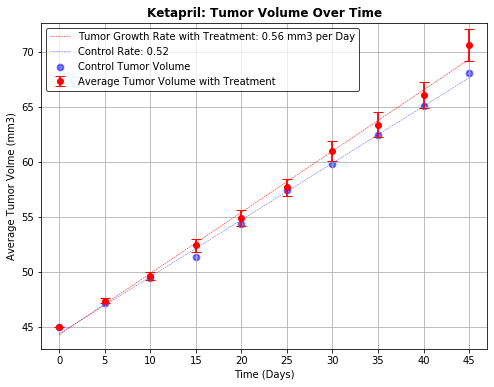

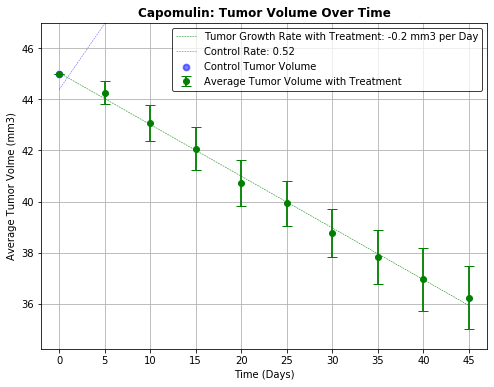

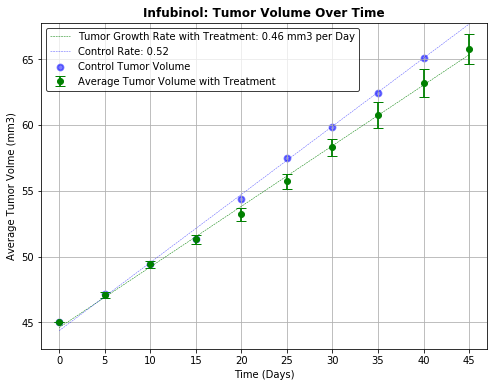

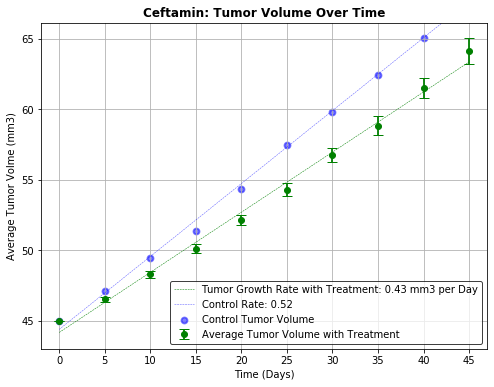

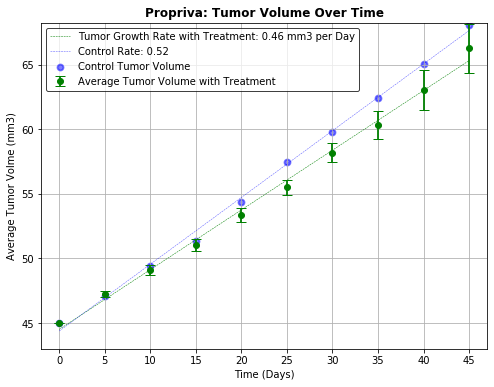

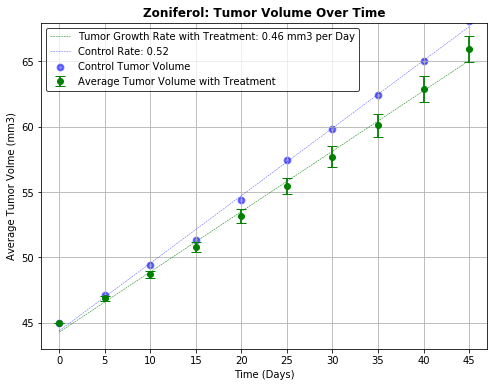

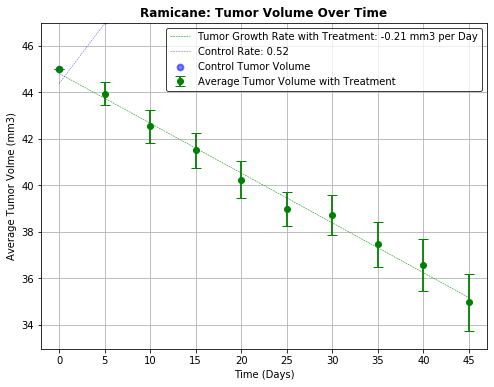

In [8]:
###MAY NEED TO REFORMAT THIS BACK TO BEING LIKE THE OTHER GRAPHS WITHOUT THE CONTROL STUFF 





drugs = mouse['Drug'].unique()
control = drugs[-1]
drugs = np.delete(drugs,-1)

control = test.loc['{}'.format(control)].reset_index()
control_x = control.loc[:,'Timepoint'].values
control_y = control.loc[:,'Tumor Volume (mm3)'].values
c_err = control.loc[:,'sem']
model_c = stats.linregress(control_x, control_y)
c_hat = [(model_c[0]*x)+model_c[1] for x in control_x]

for i in drugs:
    data = test.loc[i].reset_index()
    x_data = data.loc[:,'Timepoint'].values
    y_data = data.loc[:,'Tumor Volume (mm3)'].values
    err = data.loc[:,'sem'].values
    model = stats.linregress(x_data, y_data)
    y_hat = [(model[0]*x)+model[1] for x in x_data]
    
    if model_c[0] > model[0]:
        color = 'g'
    else:
        color= 'r'
    model = stats.linregress(x_data, y_data)
    y_hat = [(model[0]*x)+model[1] for x in x_data]
    plt.figure(figsize=(8,6))
    plt.errorbar(x_data, y_data, yerr=err, color=color,fmt='o',label='Average Tumor Volume with Treatment',
                capsize=5,linewidth=1.8)
    plt.plot(x_data, y_hat, color=color,linestyle='--' ,linewidth=.5, label='Tumor Growth Rate with Treatment: {} mm3 per Day'.format(round(model[0],2)))
    plt.scatter(control_x, control_y, color='b',marker='o',label='Control Tumor Volume',
                linewidth=1.8,alpha=.5)
    plt.plot(control_x, c_hat, color='b',alpha=.65,linestyle='--' ,linewidth=.5, label='Control Rate: {}'.format(round(model_c[0],2)))
    plt.title("{}: Tumor Volume Over Time".format(i),fontsize=12, fontweight='bold')
    plt.xlim(-2,np.max(x_data)+2)
    plt.xticks(range(0,np.max(x_data)+1,5))
    plt.xlabel('Time (Days)')
    plt.ylim(np.min(y_data)-2,np.max(y_data)+2)
    plt.ylabel('Average Tumor Volme (mm3)')
    plt.grid(True)
    plt.legend(loc='best',fancybox=True, fontsize='medium', framealpha=.75,edgecolor='k')
    plt.show()
    

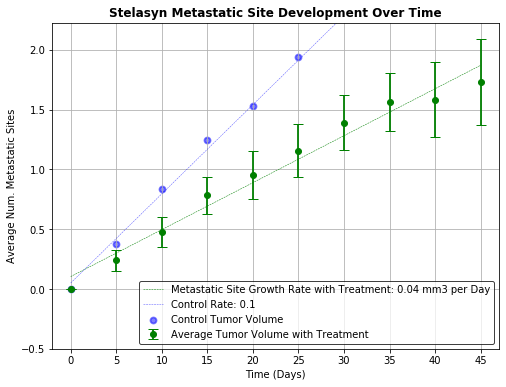

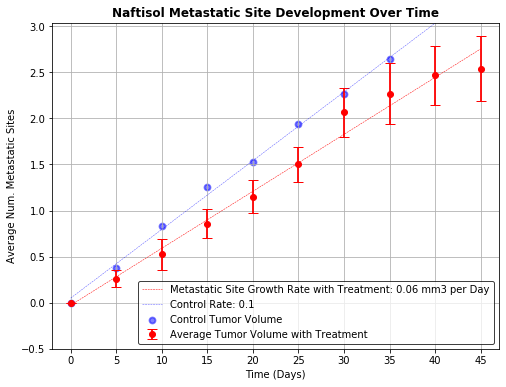

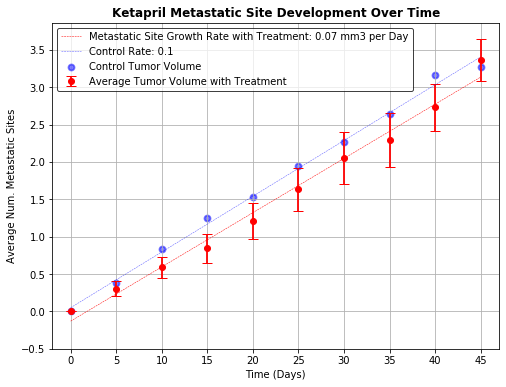

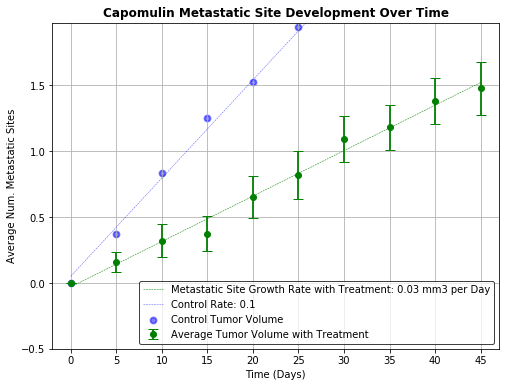

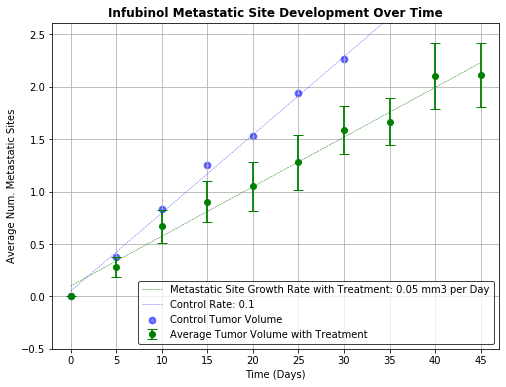

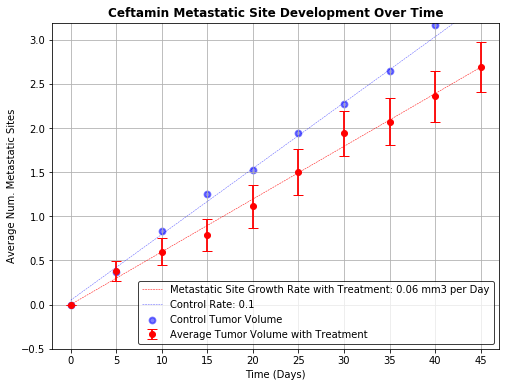

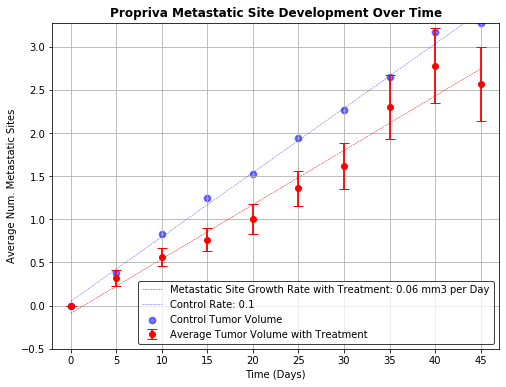

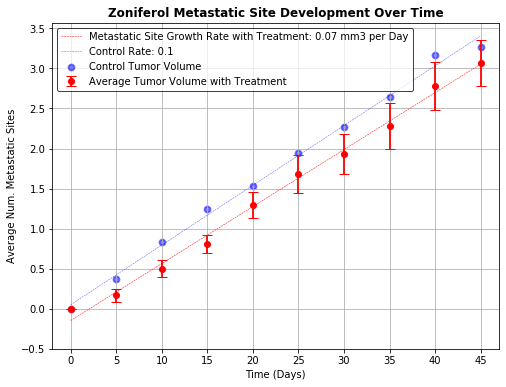

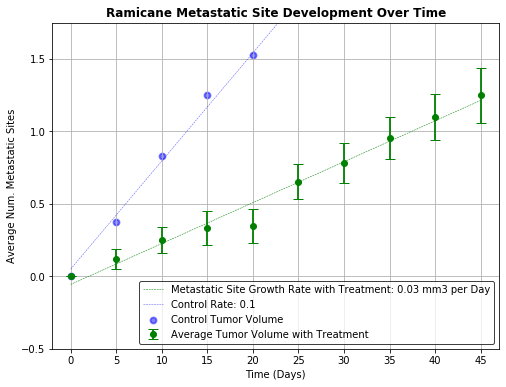

In [9]:
drugs = mouse['Drug'].unique()
control = drugs[-1]
drugs = np.delete(drugs, -1)

control = metastic.loc['{}'.format(control)].reset_index()
control_x = control.loc[:,'Timepoint'].values
control_y = control.loc[:,'Metastatic Sites'].values
c_err = control.loc[:,'error']
model_c = stats.linregress(control_x, control_y)
c_hat = [(model_c[0]*x)+model_c[1] for x in control_x]


for i in drugs:
    data = metastic.loc[i].reset_index()
    x_data = data.loc[:,'Timepoint'].values
    y_data = data.loc[:,'Metastatic Sites'].values
    err = data.loc[:,'error'].values
    
    model = stats.linregress(x_data, y_data)
    y_hat = [(model[0]*x)+model[1] for x in x_data]
    
    if (model_c[0]/ model[0]) > 1.5:
        color = 'g'
    else:
        color= 'r'
        
    plt.figure(figsize=(8,6))
    plt.errorbar(x_data, y_data, yerr=err, color=color,fmt='o',label='Average Tumor Volume with Treatment',
                capsize=5,linewidth=1.8)
    plt.plot(x_data, y_hat, color=color,linestyle='--' ,linewidth=.5, label='Metastatic Site Growth Rate with Treatment: {} mm3 per Day'.format(round(model[0],2)))
    
    plt.scatter(control_x, control_y, color='b',marker='o',label='Control Tumor Volume',
                linewidth=1.8,alpha=.5)
    plt.plot(control_x, c_hat, color='b',alpha=.65,linestyle='--' ,linewidth=.5, label='Control Rate: {}'.format(round(model_c[0],1)))



    plt.title("{} Metastatic Site Development Over Time".format(i),fontsize=12, fontweight='bold')
    plt.xlim(-2,np.max(x_data)+2)
    plt.xticks(range(0,np.max(x_data)+1,5))
    plt.xlabel('Time (Days)')
    plt.ylim(np.min(y_data)-.5,np.max(y_data)+.5)
    plt.yticks(np.arange(-.5,np.max(y_data)+.5,.5))
    plt.ylabel('Average Num. Metastatic Sites')
    plt.grid(True)
    plt.legend(loc='best',fancybox=True, fontsize='medium', framealpha=.75,edgecolor='k')
    plt.show()
    

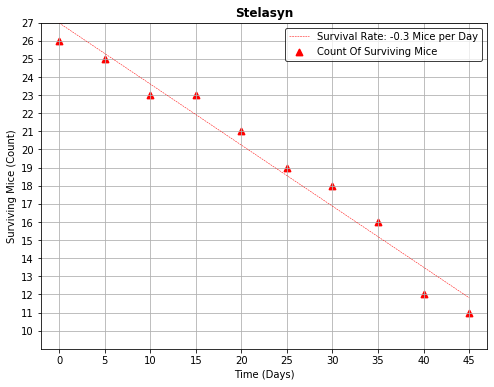

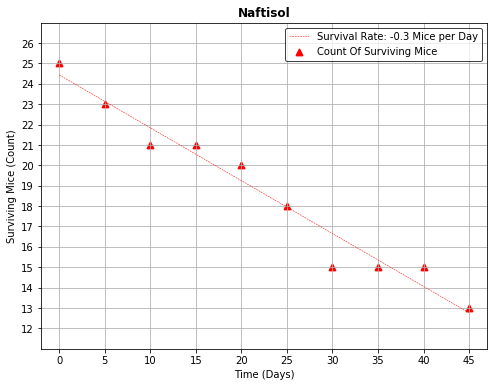

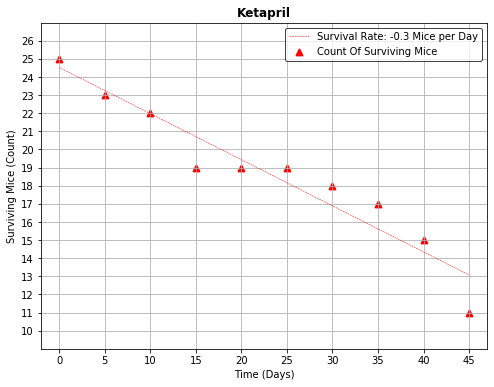

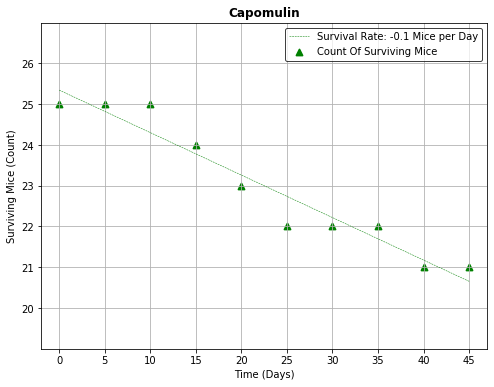

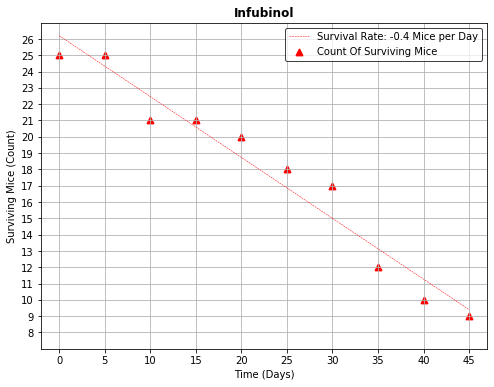

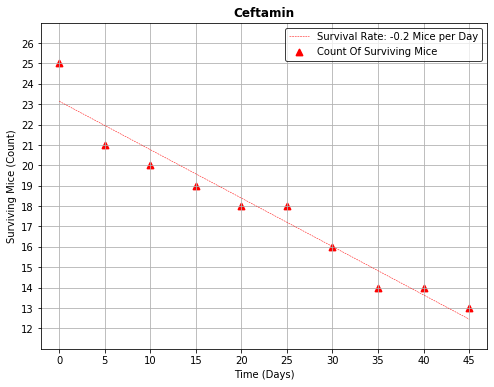

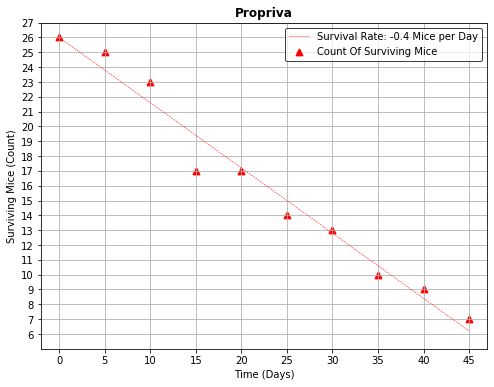

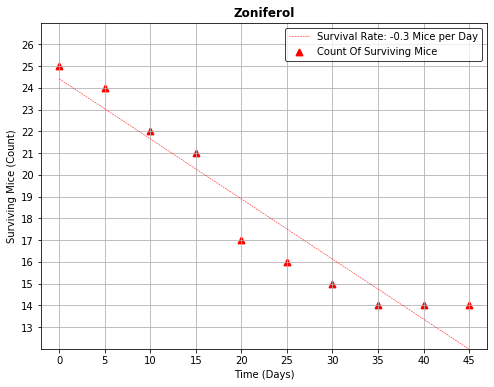

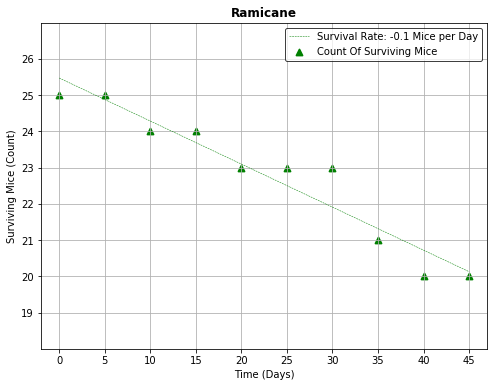

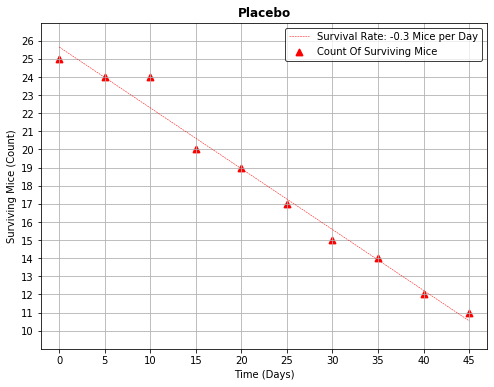

In [10]:


for i in mouse['Drug'].unique():
    data = survival.loc[i].reset_index()
    x_data = data.loc[:,'Timepoint'].values
    y_data = data.loc[:,'Mouse ID'].values
    
    if y_data[0]-y_data[-1] > 5 :
        color = 'r'
    else:
        color= 'g'
        
    model = stats.linregress(x_data, y_data)
    y_hat = [(model[0]*x)+model[1] for x in x_data]
    plt.figure(figsize=(8,6))
    plt.scatter(x_data, y_data,color=color,marker='^',label='Count Of Surviving Mice',
                linewidth=1.8)
    plt.plot(x_data, y_hat, color=color,linestyle='--' ,linewidth=.5, label='Survival Rate: {} Mice per Day'.format(round(model[0],1)))
    plt.title("{}".format(i),fontsize=12, fontweight='bold')
    plt.xlim(-2,np.max(x_data)+2)
    plt.xticks(range(0,np.max(x_data)+1,5))
    plt.xlabel('Time (Days)')
    plt.ylim(np.min(y_data)-2,27)
    plt.yticks(np.arange(np.min(y_data)-1,np.max(y_data)+2,1))
    plt.ylabel('Surviving Mice (Count)')
    plt.grid(True)
    plt.legend(loc='best',fancybox=True, fontsize='medium', framealpha=.75,edgecolor='k')
    plt.show()

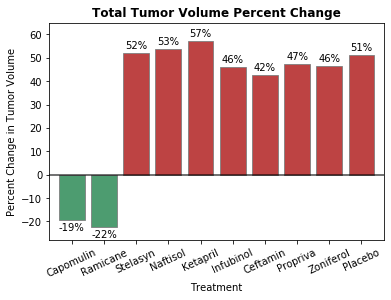

In [11]:
percent_change = []
avg_err = []
for i in mouse['Drug'].unique():
    data = test.loc[i].reset_index()
    start_vol = data.loc[:,'Tumor Volume (mm3)'].values[0]
    end_vol = data.loc[:,'Tumor Volume (mm3)'].values[-1]
    percent_change.append((end_vol-start_vol)/start_vol)
    avg_err.append(test.loc[:,'sem'].mean())

avg_err = np.multiply(np.array(avg_err),100)    
x_data = np.array(mouse['Drug'].unique())
y_data = np.array(percent_change,dtype=float)
y_data = np.multiply(y_data,100)

mask1 = y_data < 0
mask2 = y_data > 0


#plt.figure(figsize=(10,6))
fig, ax = plt.subplots()

rects1 = plt.bar(x_data[mask1],y_data[mask1], color='#2e8b57',alpha=.85,edgecolor='#808080')
rects2 = plt.bar(x_data[mask2],y_data[mask2], color='#b22222',alpha=.85,edgecolor='#808080')

for rect in rects1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height-1,
            '{}'.format(int(height)) + "%", ha='center', va='top')
for rect in rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height+1,
            '{}'.format(int(height)) + "%", ha='center', va='bottom')

plt.xticks(rotation=25)
plt.title('Total Tumor Volume Percent Change',fontsize=12, fontweight='bold')
plt.xlabel('Treatment')
plt.ylabel('Percent Change in Tumor Volume')
plt.xlim(-0.7,9.7)
plt.ylim(-28,65)
plt.hlines(0,-1,10, alpha=.73)
plt.yticks(np.arange(-20,61,10))
plt.show()


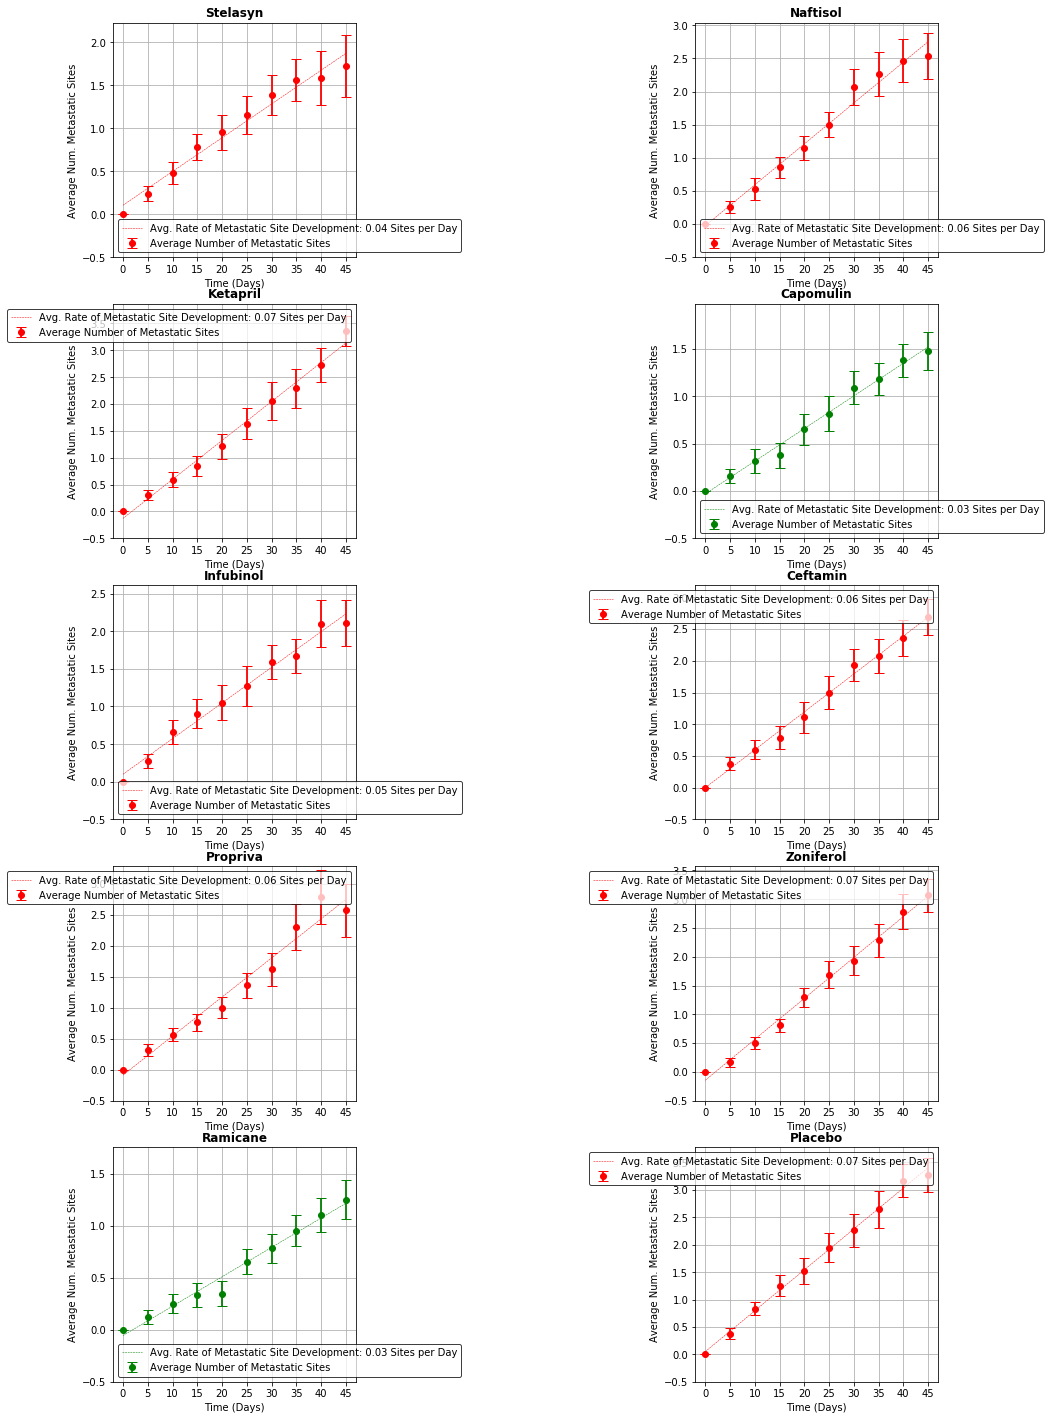

In [12]:
num_rows = 5
num_cols = 2
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(len(mouse['Drug'].unique())):
    plt.subplot(num_rows,2*num_cols,2*i+1)
#for i in mouse['Drug'].unique():
    data = metastic.loc[mouse['Drug'].unique()[i]].reset_index()
    x_data = data.loc[:,'Timepoint'].values
    y_data = data.loc[:,'Metastatic Sites'].values
    err = data.loc[:,'error'].values
    
    if y_data[-1] > 1.5 :
        color = 'r'
    else:
        color= 'g'
    model = stats.linregress(x_data, y_data)
    y_hat = [(model[0]*x)+model[1] for x in x_data]
    #plt.figure(figsize=(10,10))
    plt.errorbar(x_data, y_data, yerr=err, color=color,fmt='o',label='Average Number of Metastatic Sites',
                capsize=5,linewidth=1.8)
    plt.plot(x_data, y_hat, color=color,linestyle='--' ,linewidth=.5, label='Avg. Rate of Metastatic Site Development: {} Sites per Day'.format(round(model[0],2)))
    plt.title("{}".format(mouse['Drug'].unique()[i]),fontsize=12, fontweight='bold')
    plt.xlim(-2,np.max(x_data)+2)
    plt.xticks(range(0,np.max(x_data)+1,5))
    plt.xlabel('Time (Days)')
    plt.ylim(np.min(y_data)-.5,np.max(y_data)+.5)
    plt.yticks(np.arange(-.5,np.max(y_data)+.5,.5))
    plt.ylabel('Average Num. Metastatic Sites')
    plt.grid(True)
    plt.legend(loc='best',fancybox=True, fontsize='medium', framealpha=.75,edgecolor='k')
    
plt.show()